# Week 4 Lab: Regularization

### Learning objectives:
* Be able to build a simple logistic regression classifier
* Be able to incorporate regularization into your solution
* Be able to assess the performance differences across regularization parameters using cross validation
* Be able to express your conclusions succinctly

## Description

There are several types of iris flowers.  One, *Iris virginica*, is a deadly poison, and so you want to build an ML algorithm to identify it.  Your task this week is build a logistic regression classifier to identify this class. The data for this project will be the classic "iris dataset" (see below for details on how to get it).  Your work should include the following elements:

*  Train different models using different regularization parameters (read the software documentation if you need help understanding the parameters)
*  Choose a meaningful metric by which to assess each model, and compare performance using some appropriate methodology (e.g. cross validation)
*  Write a "one pager" that summarizes your findings.  Your one-pager should be done in something like Microsoft word and include one or two well-constructed plots.

Some things to think about:
* Is it better to have a false negative or a false positive?
* Does your metric reflect this?
* All classifiers will have errors.  What language is appropriate for describing the rate at which you expect to encounter those errors?



# Get the data


In [1]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True) # this loads something called a Bunch
list(iris) # this lets us see what data elements are in the Bunch

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Split the data and train a logistic regressor

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Get independent and dependent variables
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

In [5]:
# more code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_folds = KFold(n_splits = 5)

In [6]:
#penalty = 'l2'
#C = 1.0
#solver = 'liblinear'

#model = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42)

In [7]:
# Evaluate the model
#scores = cross_val_score(model, X, y, cv = k_folds)
#print("CV score: {:.2f}%".format(scores.mean()*100))

## Play with the regularization parameter

Look at the `sklearn` documentation if you need help here.  You should change the regularization parameter, retrain, reassess


In [8]:
accuracy_l1 = []
accuracy_l2 = []
Cs =[0.01, 0.1, 1.0, 10, 100] #C values for both l1 and l2

In [9]:
penalty = 'l1'
C = 0.01
solver = 'liblinear'

l1_model = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42)

In [10]:
scores = cross_val_score(l1_model, X, y, cv = k_folds)
accuracy_l1.append(scores.mean())
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 66.67%


In [32]:
penalty = 'l1'
C = 0.1
solver = 'liblinear'

l1_model4 = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42)

In [33]:
scores = cross_val_score(l1_model4, X, y, cv = k_folds)
accuracy_l1.append(scores.mean())
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 49.33%


In [13]:
penalty = 'l1'
C = 1.0
solver = 'liblinear'

l1_model2 = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42)

In [14]:
scores = cross_val_score(l1_model2, X, y, cv = k_folds)
accuracy_l1.append(scores.mean())
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 89.33%


In [15]:
penalty = 'l1'
C = 10
solver = 'liblinear'

l1_model3 = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42)

In [16]:
scores = cross_val_score(l1_model3, X, y, cv = k_folds)
accuracy_l1.append(scores.mean())
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 94.67%


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [17]:
penalty = 'l1'
C = 100
solver = 'liblinear'

l1_model5 = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42)

In [18]:
scores = cross_val_score(l1_model5, X, y, cv = k_folds)
accuracy_l1.append(scores.mean())
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 94.67%


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [19]:
penalty = 'l2'
C = 0.01
solver = 'liblinear'

HC_model = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42)

In [20]:
scores = cross_val_score(HC_model, X, y, cv = k_folds)
accuracy_l2.append(scores.mean())
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 40.00%


In [21]:
penalty = 'l2'
C = 0.1
solver = 'liblinear'

MC_model = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42)

In [22]:
scores = cross_val_score(MC_model, X, y, cv = k_folds)
accuracy_l2.append(scores.mean())
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 54.00%


In [23]:
penalty = 'l2'
C = 1.0
solver = 'liblinear'

LC_model2 = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42)

In [24]:
scores = cross_val_score(LC_model2, X, y, cv = k_folds)
accuracy_l2.append(scores.mean())
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 79.33%


In [25]:
penalty = 'l2'
C = 10
solver = 'liblinear'

LC_model3 = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42)

In [26]:
scores = cross_val_score(LC_model3, X, y, cv = k_folds)
accuracy_l2.append(scores.mean())
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 90.00%


In [27]:
penalty = 'l2'
C = 100
solver = 'liblinear'

LC_model4 = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42)

In [28]:
scores = cross_val_score(LC_model4, X, y, cv = k_folds)
accuracy_l2.append(scores.mean())
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 94.67%


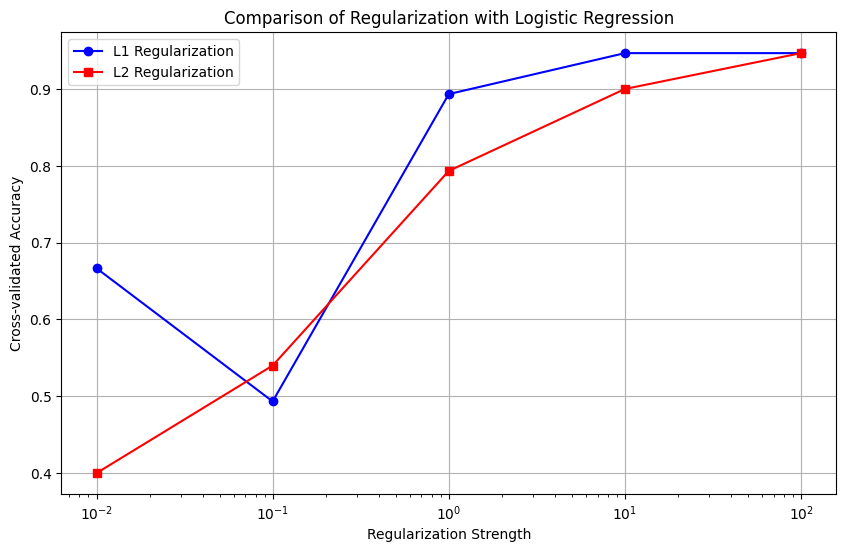

In [29]:
#plot the result
Cs =[0.01, 0.1, 1.0, 10.0, 100.0]
plt.figure(figsize=(10, 6))
plt.plot(Cs, accuracy_l1, marker='o', label='L1 Regularization', color='blue')
plt.plot(Cs, accuracy_l2, marker='s', label='L2 Regularization', color='red')
plt.xscale('log')
plt.xlabel('Regularization Strength')
plt.ylabel('Cross-validated Accuracy')
plt.title('Comparison of Regularization with Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

## Draw some conclusions

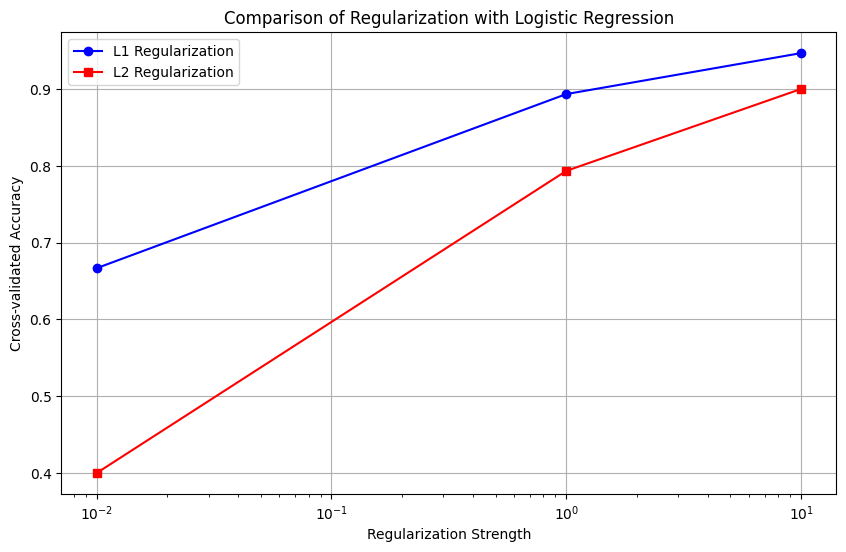